# Tissue-specific genes based on MGI Gene Expression Database

In [1]:
import numpy as np
import pandas as pd

Import mean dNdS scores and 92 species' dNdS scores for each mouse protein coding gene, indexed with Ensembl ID. 

In [2]:
info_df = pd.read_csv('../data/info.mouse_protein_coding_genes.tsv',sep='\t',header=0,index_col=0)
info_df.drop_duplicates(subset='Gene name',inplace=True) # Drop the duplicated gene names

In [3]:
info_df

,Gene name,Gene description
Gene stable ID,,
ENSMUSG00000064370,mt-Cytb,mitochondrially encoded cytochrome b [Source:M...
ENSMUSG00000064368,mt-Nd6,mitochondrially encoded NADH dehydrogenase 6 [...
ENSMUSG00000064367,mt-Nd5,mitochondrially encoded NADH dehydrogenase 5 [...
ENSMUSG00000064363,mt-Nd4,mitochondrially encoded NADH dehydrogenase 4 [...
ENSMUSG00000065947,mt-Nd4l,mitochondrially encoded NADH dehydrogenase 4L ...
...,...,...
ENSMUSG00000110971,AC117188.1,NaN
ENSMUSG00000116252,MF597757.1,NaN
ENSMUSG00000116477,MF597757.2,NaN


In [4]:
# Stats of mean dN/dS
stats_df = pd.read_csv('../results/Ensembl98_mouse/mouse.dNdS_stats.all_genes.tsv',sep='\t',index_col=0)

In [5]:
stats_df

,Gene name,count,mean,std,min,25%,50%,75%,max
Gene stable ID,,,,,,,,,
ENSMUSG00000064370,mt-Cytb,1.0,0.020620,NaN,0.020620,0.020620,0.020620,0.020620,0.020620
ENSMUSG00000064368,mt-Nd6,39.0,0.016243,0.015169,0.002987,0.004620,0.014597,0.020531,0.081817
ENSMUSG00000064367,mt-Nd5,4.0,0.040241,0.020722,0.022880,0.029840,0.033916,0.044317,0.070252
ENSMUSG00000065947,mt-Nd4l,2.0,0.013863,0.013198,0.004531,0.009197,0.013863,0.018530,0.023196
ENSMUSG00000064360,mt-Nd3,1.0,0.037464,NaN,0.037464,0.037464,0.037464,0.037464,0.037464
...,...,...,...,...,...,...,...,...,...
ENSMUSG00000006307,Kmt2b,70.0,0.131660,0.020034,0.088047,0.117946,0.128773,0.141021,0.195441
ENSMUSG00000050035,Fhl4,33.0,0.510940,0.263344,0.210796,0.372197,0.478016,0.534439,1.427273
ENSMUSG00000037652,Phc3,80.0,0.092761,0.018379,0.071355,0.084387,0.087158,0.094192,0.198765


Import MGI IDs for genes specific to each organ.

In [6]:
MGI_df = pd.read_csv('../results/MGI_organs/MGI_ID-tissue_type.tsv',sep='\t',index_col=0,names=['MGI ID','Tissue'])

In [7]:
MGI_df['Tissue'].value_counts()

brain          475
liver           87
lung            56
heart           56
pancreas        45
kidney          45
skin            40
musculature     22
Name: Tissue, dtype: int64

Import the matching ensembl IDs

In [8]:
Ensembl_df = pd.read_csv('../data/MGI_organs/Ensembl_ID-MGI_ID.tsv',sep='\t',index_col=1)
Ensembl_df = Ensembl_df[~Ensembl_df.index.duplicated(keep='first')] # remove duplicated Ensembl IDs for the same gene

In [9]:
Ensembl_df

,Gene stable ID
MGI ID,
MGI:101774,ENSMUSG00000003379
MGI:101920,ENSMUSG00000002957
MGI:102581,ENSMUSG00000066441
MGI:102744,ENSMUSG00000024369
MGI:102756,ENSMUSG00000036938
...,...
MGI:99481,ENSMUSG00000031645
MGI:99515,ENSMUSG00000021457
MGI:99668,ENSMUSG00000027322


In [10]:
organ_df = pd.merge(MGI_df,Ensembl_df, left_index=True, right_index=True, how='right')
organ_df = organ_df.reset_index().set_index('Gene stable ID')

In [11]:
organ_df

,MGI ID,Tissue
Gene stable ID,,
ENSMUSG00000003379,MGI:101774,liver
ENSMUSG00000002957,MGI:101920,brain
ENSMUSG00000066441,MGI:102581,brain
ENSMUSG00000024369,MGI:102744,brain
ENSMUSG00000036938,MGI:102756,pancreas
...,...,...
ENSMUSG00000031645,MGI:99481,liver
ENSMUSG00000021457,MGI:99515,liver
ENSMUSG00000027322,MGI:99668,NaN


In [12]:
organ_df['Tissue'].value_counts()

brain          452
liver           86
heart           55
lung            54
pancreas        45
kidney          45
skin            38
musculature     20
Name: Tissue, dtype: int64

In [13]:
organ_avg_df = pd.merge(organ_df[['Tissue']],stats_df[['mean']],left_index=True,right_index=True,how='left')
organ_avg_df.dropna(inplace=True)

In [14]:
organ_avg_df

,Tissue,mean
Gene stable ID,,
ENSMUSG00000003379,liver,0.220370
ENSMUSG00000002957,brain,0.020133
ENSMUSG00000066441,brain,0.156972
ENSMUSG00000024369,brain,0.068920
ENSMUSG00000029608,brain,0.067425
...,...,...
ENSMUSG00000030287,brain,0.028274
ENSMUSG00000074037,skin,0.134772
ENSMUSG00000031645,liver,0.204065


In [15]:
organ_avg_df['Tissue'].value_counts()

brain          410
liver           77
heart           48
kidney          43
pancreas        42
lung            37
skin            33
musculature     17
Name: Tissue, dtype: int64

In [6]:
# organ_avg_df=pd.merge(info_df,organ_avg_df,left_index=True,right_index=True,how='right')

In [16]:
brain_df = organ_avg_df[organ_avg_df['Tissue']=='brain']
brain_arr = brain_df['mean'].dropna().values
heart_df = organ_avg_df[organ_avg_df['Tissue']=='heart']
heart_arr = heart_df['mean'].dropna().values
kidney_df = organ_avg_df[organ_avg_df['Tissue']=='kidney']
kidney_arr = kidney_df['mean'].dropna().values
liver_df = organ_avg_df[organ_avg_df['Tissue']=='liver']
liver_arr = liver_df['mean'].dropna().values
lung_df = organ_avg_df[organ_avg_df['Tissue']=='lung']
lung_arr = lung_df['mean'].dropna().values
pancreas_df = organ_avg_df[organ_avg_df['Tissue']=='pancreas']
pancreas_arr = pancreas_df['mean'].dropna().values
skin_df = organ_avg_df[organ_avg_df['Tissue']=='skin']
skin_arr = skin_df['mean'].dropna().values
musculature_df = organ_avg_df[organ_avg_df['Tissue']=='musculature']
musculature_arr = musculature_df['mean'].dropna().values

import dN/dS of neuron-specific genes

In [17]:
neuron_avg_df=pd.read_csv('../results/mouse.celltype-specific_genes/protein-coding_w_dNdS/avg_92species/neuron.tsv',sep='\t',header=0,index_col=0)

In [18]:
neuron_avg_df.insert(loc=0, column='Tissue', value='neuron')

In [19]:
neuron_avg_df

,Tissue,mean
Gene name,,
1500009L16Rik,neuron,0.203317
1700001L19Rik,neuron,0.246097
4930444P10Rik,neuron,0.366798
4930447C04Rik,neuron,0.314530
4930452B06Rik,neuron,0.260316
...,...,...
Zim1,neuron,0.146601
Zkscan16,neuron,0.346976
Zmat4,neuron,0.049437


In [20]:
concat_df=pd.concat([organ_avg_df,neuron_avg_df],sort=True)

In [21]:
concat_df

,Tissue,mean
ENSMUSG00000003379,liver,0.220370
ENSMUSG00000002957,brain,0.020133
ENSMUSG00000066441,brain,0.156972
ENSMUSG00000024369,brain,0.068920
ENSMUSG00000029608,brain,0.067425
...,...,...
Zim1,neuron,0.146601
Zkscan16,neuron,0.346976
Zmat4,neuron,0.049437
Zpbp,neuron,0.255733


### Confidence interval of organ-specific genes median dN/dS

In [22]:
import heapq
import scipy.stats as stats

In [23]:
organ_arr_list=[heart_arr,brain_arr,musculature_arr,kidney_arr,pancreas_arr,skin_arr,lung_arr,liver_arr]
for arr in organ_arr_list:
    med=np.median(arr)
    low = stats.binom.interval(alpha=.95,n=arr.shape[0],p=.5)[0]
    high = stats.binom.interval(alpha=.95,n=arr.shape[0],p=.5)[1]
    CI_low = heapq.nsmallest(low.astype(int),arr)[-1]
    CI_high = heapq.nsmallest(high.astype(int),arr)[-1]
    print(med)
    print(CI_low)
    print(CI_high)
    print('------')

0.08221573021912455
0.06326827609279982
0.11601783151577273
------
0.10768512536574533
0.09276124449486403
0.11694232308147398
------
0.12754366337087225
0.060057274849618175
0.1641875891297568
------
0.15201084707146362
0.0928128447930742
0.20851347478025745
------
0.1547158007370438
0.10924499370812242
0.18387411915263285
------
0.16055321805449013
0.1088024845363787
0.2554047948867313
------
0.16900563892156972
0.1210270029370296
0.23120062322934715
------
0.2190968376320913
0.17090915472856644
0.2741379869550264
------


### Mann-Whitney U Test Against neuron-specific genes

In [24]:
# import dN/dS values (averaged across 92 species) of neuron-specific genes
neuron_arr=np.loadtxt(fname='../results/mouse.celltype-specific_genes/protein-coding_w_dNdS/avg_92species/neuron.tsv',
                     delimiter='\t', skiprows=1, usecols=(1))

In [25]:
neuron_arr.shape

(1298,)

In [26]:
np.median(neuron_arr) # making sure the array is correct

0.07300141050259344

In [27]:
import pingouin as pg

In [28]:
for arr in organ_arr_list:
    mwu_df=pg.mwu(arr,neuron_arr,tail='two-sided')
    print(mwu_df)
#     med=np.median(arr)
#     low = stats.binom.interval(alpha=.95,n=arr.shape[0],p=.5)[0]
#     high = stats.binom.interval(alpha=.95,n=arr.shape[0],p=.5)[1]
#     CI_low = heapq.nsmallest(low.astype(int),arr)[-1]
#     CI_high = heapq.nsmallest(high.astype(int),arr)[-1]
#     print(med)
#     print(CI_low)
#     print(CI_high)
    print('------')

       U-val       tail     p-val       RBC      CLES
MWU  34311.0  two-sided  0.232343 -0.101406  0.550703
------
        U-val       tail         p-val       RBC      CLES
MWU  323021.0  two-sided  6.178213e-11 -0.213954  0.606977
------
       U-val       tail     p-val       RBC      CLES
MWU  13683.0  two-sided  0.088531 -0.240189  0.620094
------
       U-val       tail     p-val      RBC      CLES
MWU  38671.0  two-sided  0.000016 -0.38571  0.692855
------
       U-val       tail     p-val       RBC      CLES
MWU  37088.5  two-sided  0.000068 -0.360646  0.680323
------
       U-val       tail         p-val       RBC     CLES
MWU  32747.0  two-sided  2.038084e-07 -0.529019  0.76451
------
       U-val       tail         p-val       RBC      CLES
MWU  35906.0  two-sided  2.702864e-07 -0.495273  0.747637
------
       U-val       tail         p-val       RBC      CLES
MWU  81236.0  two-sided  2.590308e-20 -0.625598  0.812799
------


### Plotting

In [29]:
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
import matplotlib.ticker as mtick

In [30]:
from statannot import add_stat_annotation

In [31]:
matplotlib.rcParams['figure.dpi']= 300

### p threshold at 0.05, without bonferroni correction

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

heart v.s. neuron: Mann-Whitney-Wilcoxon test two-sided, P_val=2.323e-01 U_stat=3.431e+04
musculature v.s. neuron: Mann-Whitney-Wilcoxon test two-sided, P_val=8.853e-02 U_stat=1.368e+04
liver v.s. neuron: Mann-Whitney-Wilcoxon test two-sided, P_val=2.590e-20 U_stat=8.124e+04
lung v.s. neuron: Mann-Whitney-Wilcoxon test two-sided, P_val=2.703e-07 U_stat=3.591e+04
skin v.s. neuron: Mann-Whitney-Wilcoxon test two-sided, P_val=2.038e-07 U_stat=3.275e+04
pancreas v.s. neuron: Mann-Whitney-Wilcoxon test two-sided, P_val=6.816e-05 U_stat=3.709e+04
kidney v.s. neuron: Mann-Whitney-Wilcoxon test two-sided, P_val=1.646e-05 U_stat=3.867e+04
brain v.s. neuron: Mann-Whitney-Wilcoxon test two-sided, P_val=6.176e-11 U_stat=3.230e+05


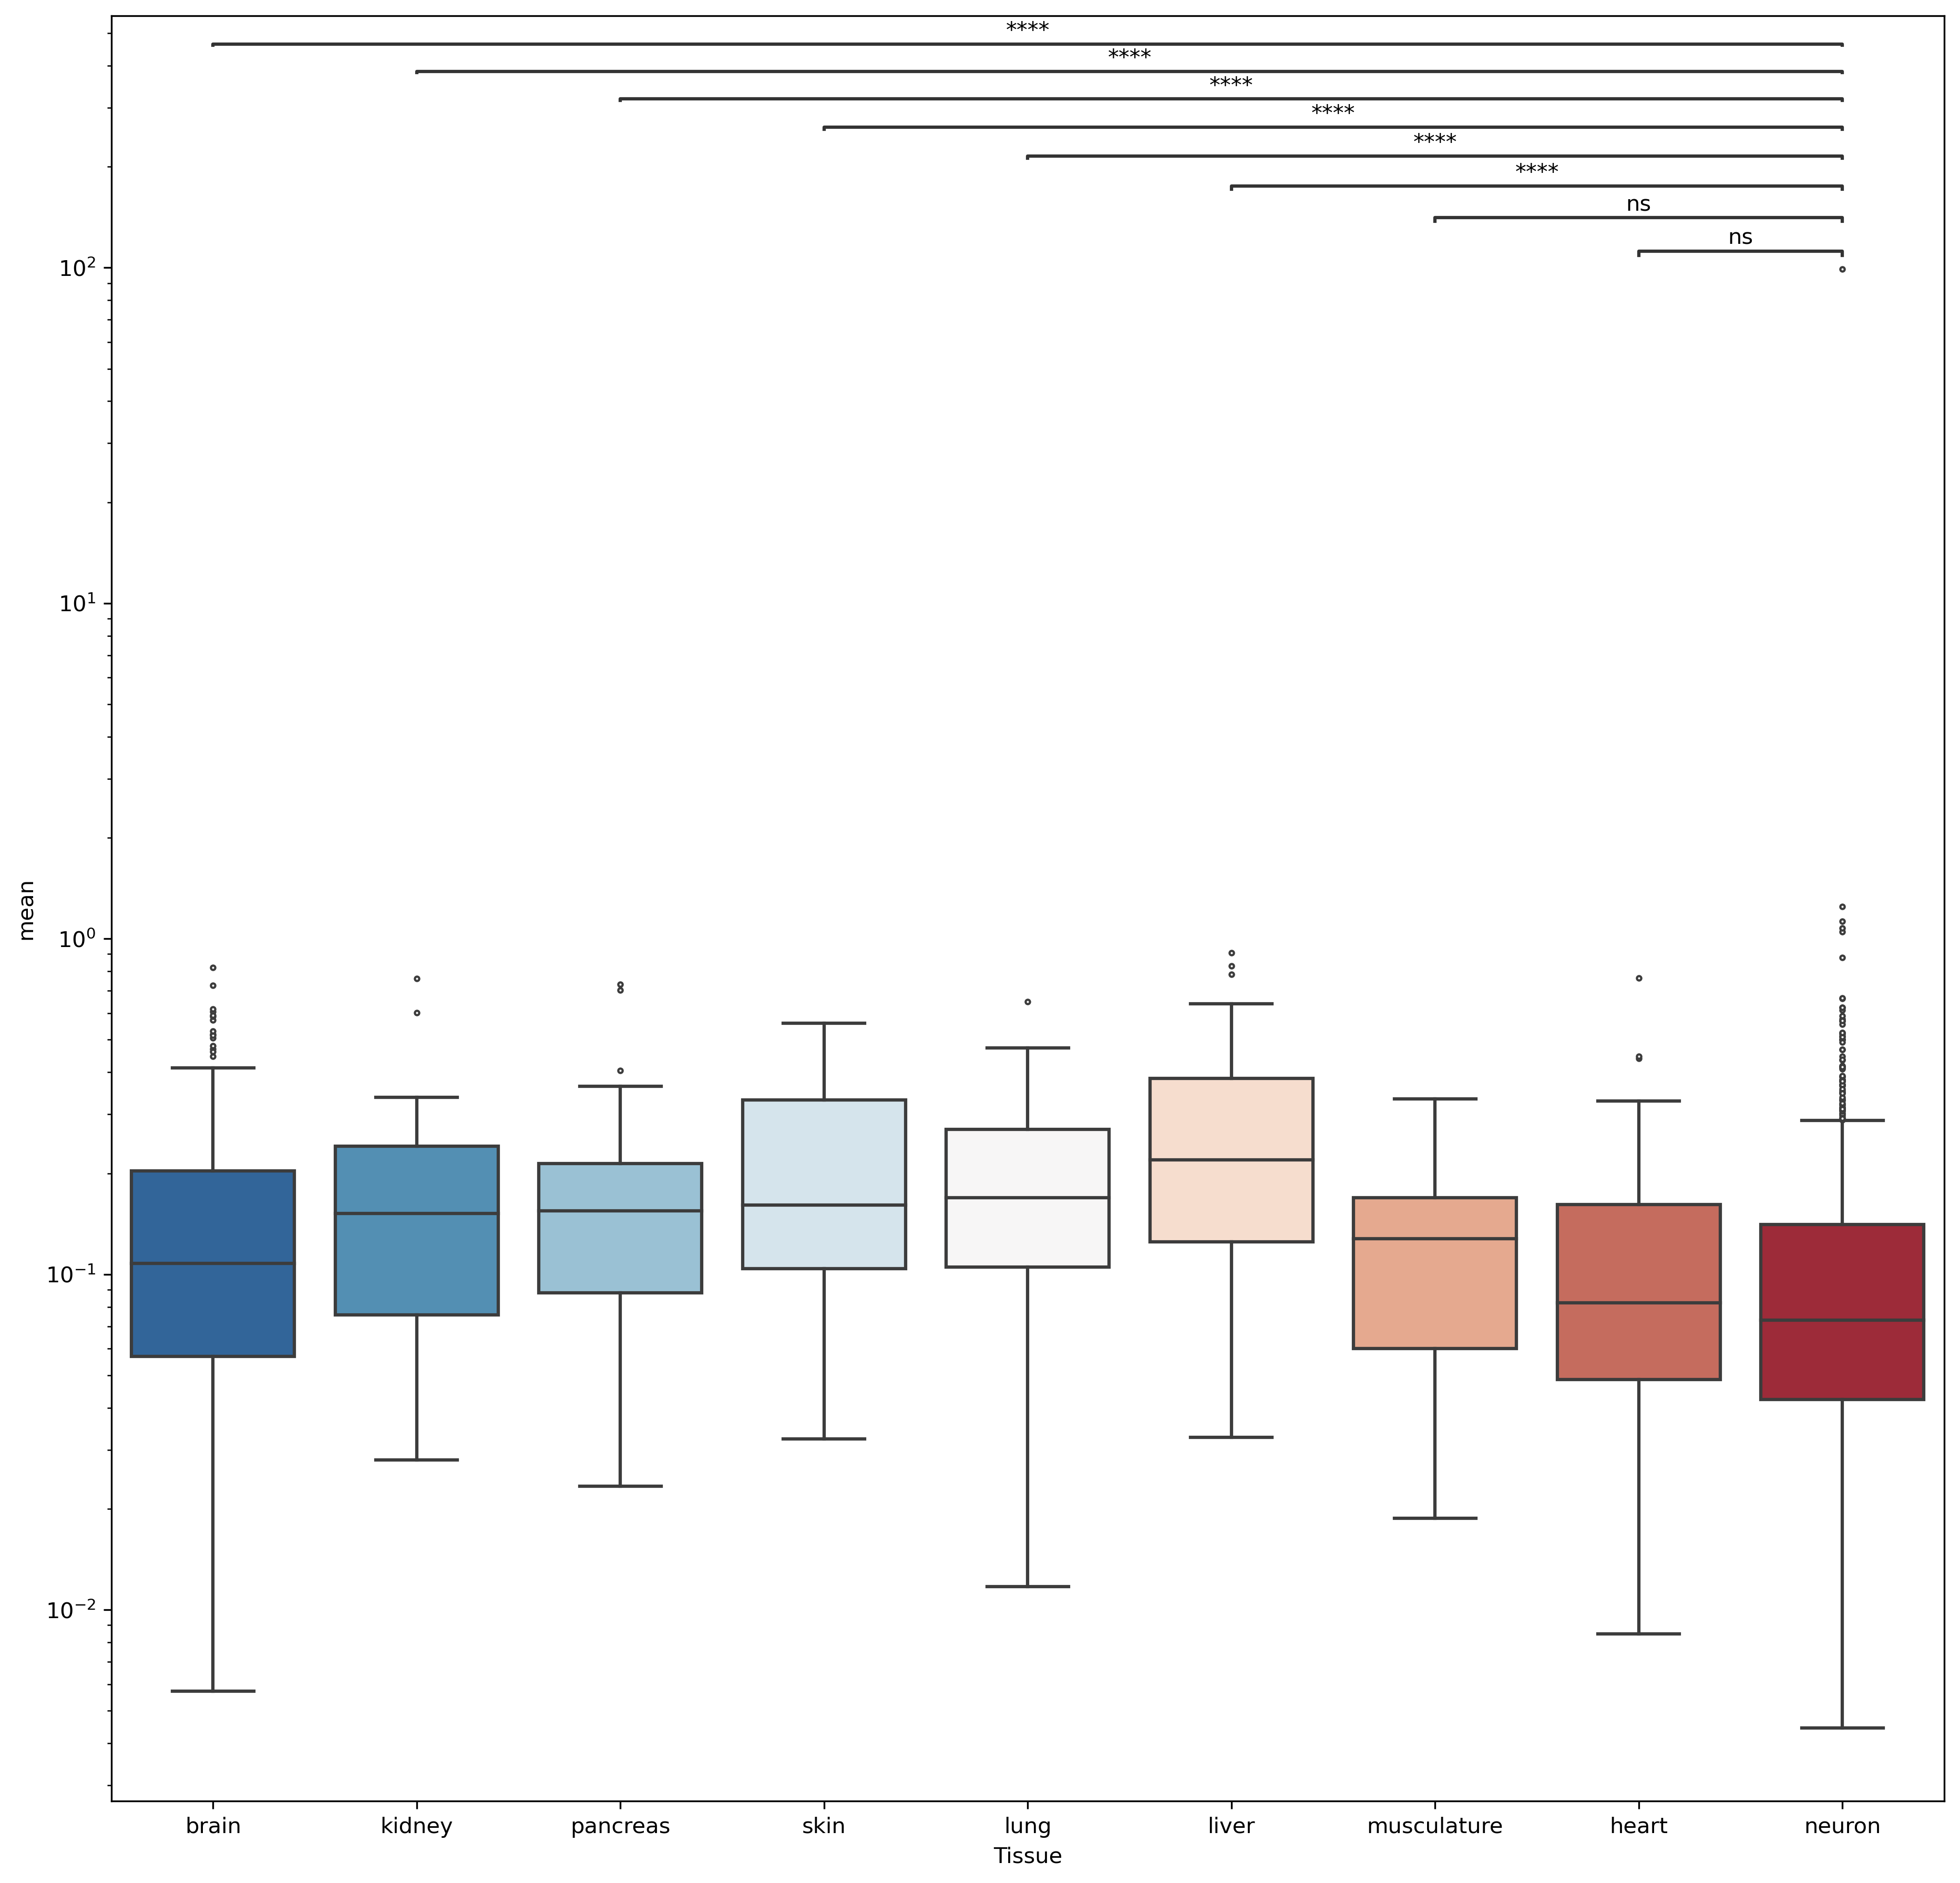

In [33]:
fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot()
x = "Tissue"
y = "mean"
order=['brain','kidney','pancreas','skin','lung','liver','musculature','heart','neuron']
flierprops = dict(marker='o',markerfacecolor='1', markersize=2,linestyle='none')
palette=sns.color_palette('RdBu_r', n_colors=9)
sns.boxplot(ax=ax,data=concat_df, x=x, y=y, order=order, flierprops=flierprops,palette=palette)
ax.set(yscale='log')
add_stat_annotation(ax,data=concat_df, x=x, y=y, order=order,
                                   box_pairs=[('pancreas','neuron'),('musculature','neuron'),('lung','neuron'),
                                              ('kidney','neuron'),('liver','neuron'),('brain','neuron'),
                                              ('heart','neuron'),('skin','neuron')],
                                   comparisons_correction=None,
                                   test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
plt.show()
fig.savefig('../figures/mouse.neuron_vs_organs.pdf', transparent=True)

In [35]:
### p threshold at conservative 0.0001, without bonferroni correction

p-value annotation legend:
ns: 1.00e-04 < p <= 1.00e+00
*: 1.00e-05 < p <= 1.00e-04
**: 1.00e-06 < p <= 1.00e-05
***: 1.00e-07 < p <= 1.00e-06
****: p <= 1.00e-07

heart v.s. neuron: Mann-Whitney-Wilcoxon test two-sided, P_val=2.323e-01 U_stat=3.431e+04
musculature v.s. neuron: Mann-Whitney-Wilcoxon test two-sided, P_val=8.853e-02 U_stat=1.368e+04
liver v.s. neuron: Mann-Whitney-Wilcoxon test two-sided, P_val=2.590e-20 U_stat=8.124e+04
lung v.s. neuron: Mann-Whitney-Wilcoxon test two-sided, P_val=2.703e-07 U_stat=3.591e+04
skin v.s. neuron: Mann-Whitney-Wilcoxon test two-sided, P_val=2.038e-07 U_stat=3.275e+04
pancreas v.s. neuron: Mann-Whitney-Wilcoxon test two-sided, P_val=6.816e-05 U_stat=3.709e+04
kidney v.s. neuron: Mann-Whitney-Wilcoxon test two-sided, P_val=1.646e-05 U_stat=3.867e+04
brain v.s. neuron: Mann-Whitney-Wilcoxon test two-sided, P_val=6.176e-11 U_stat=3.230e+05


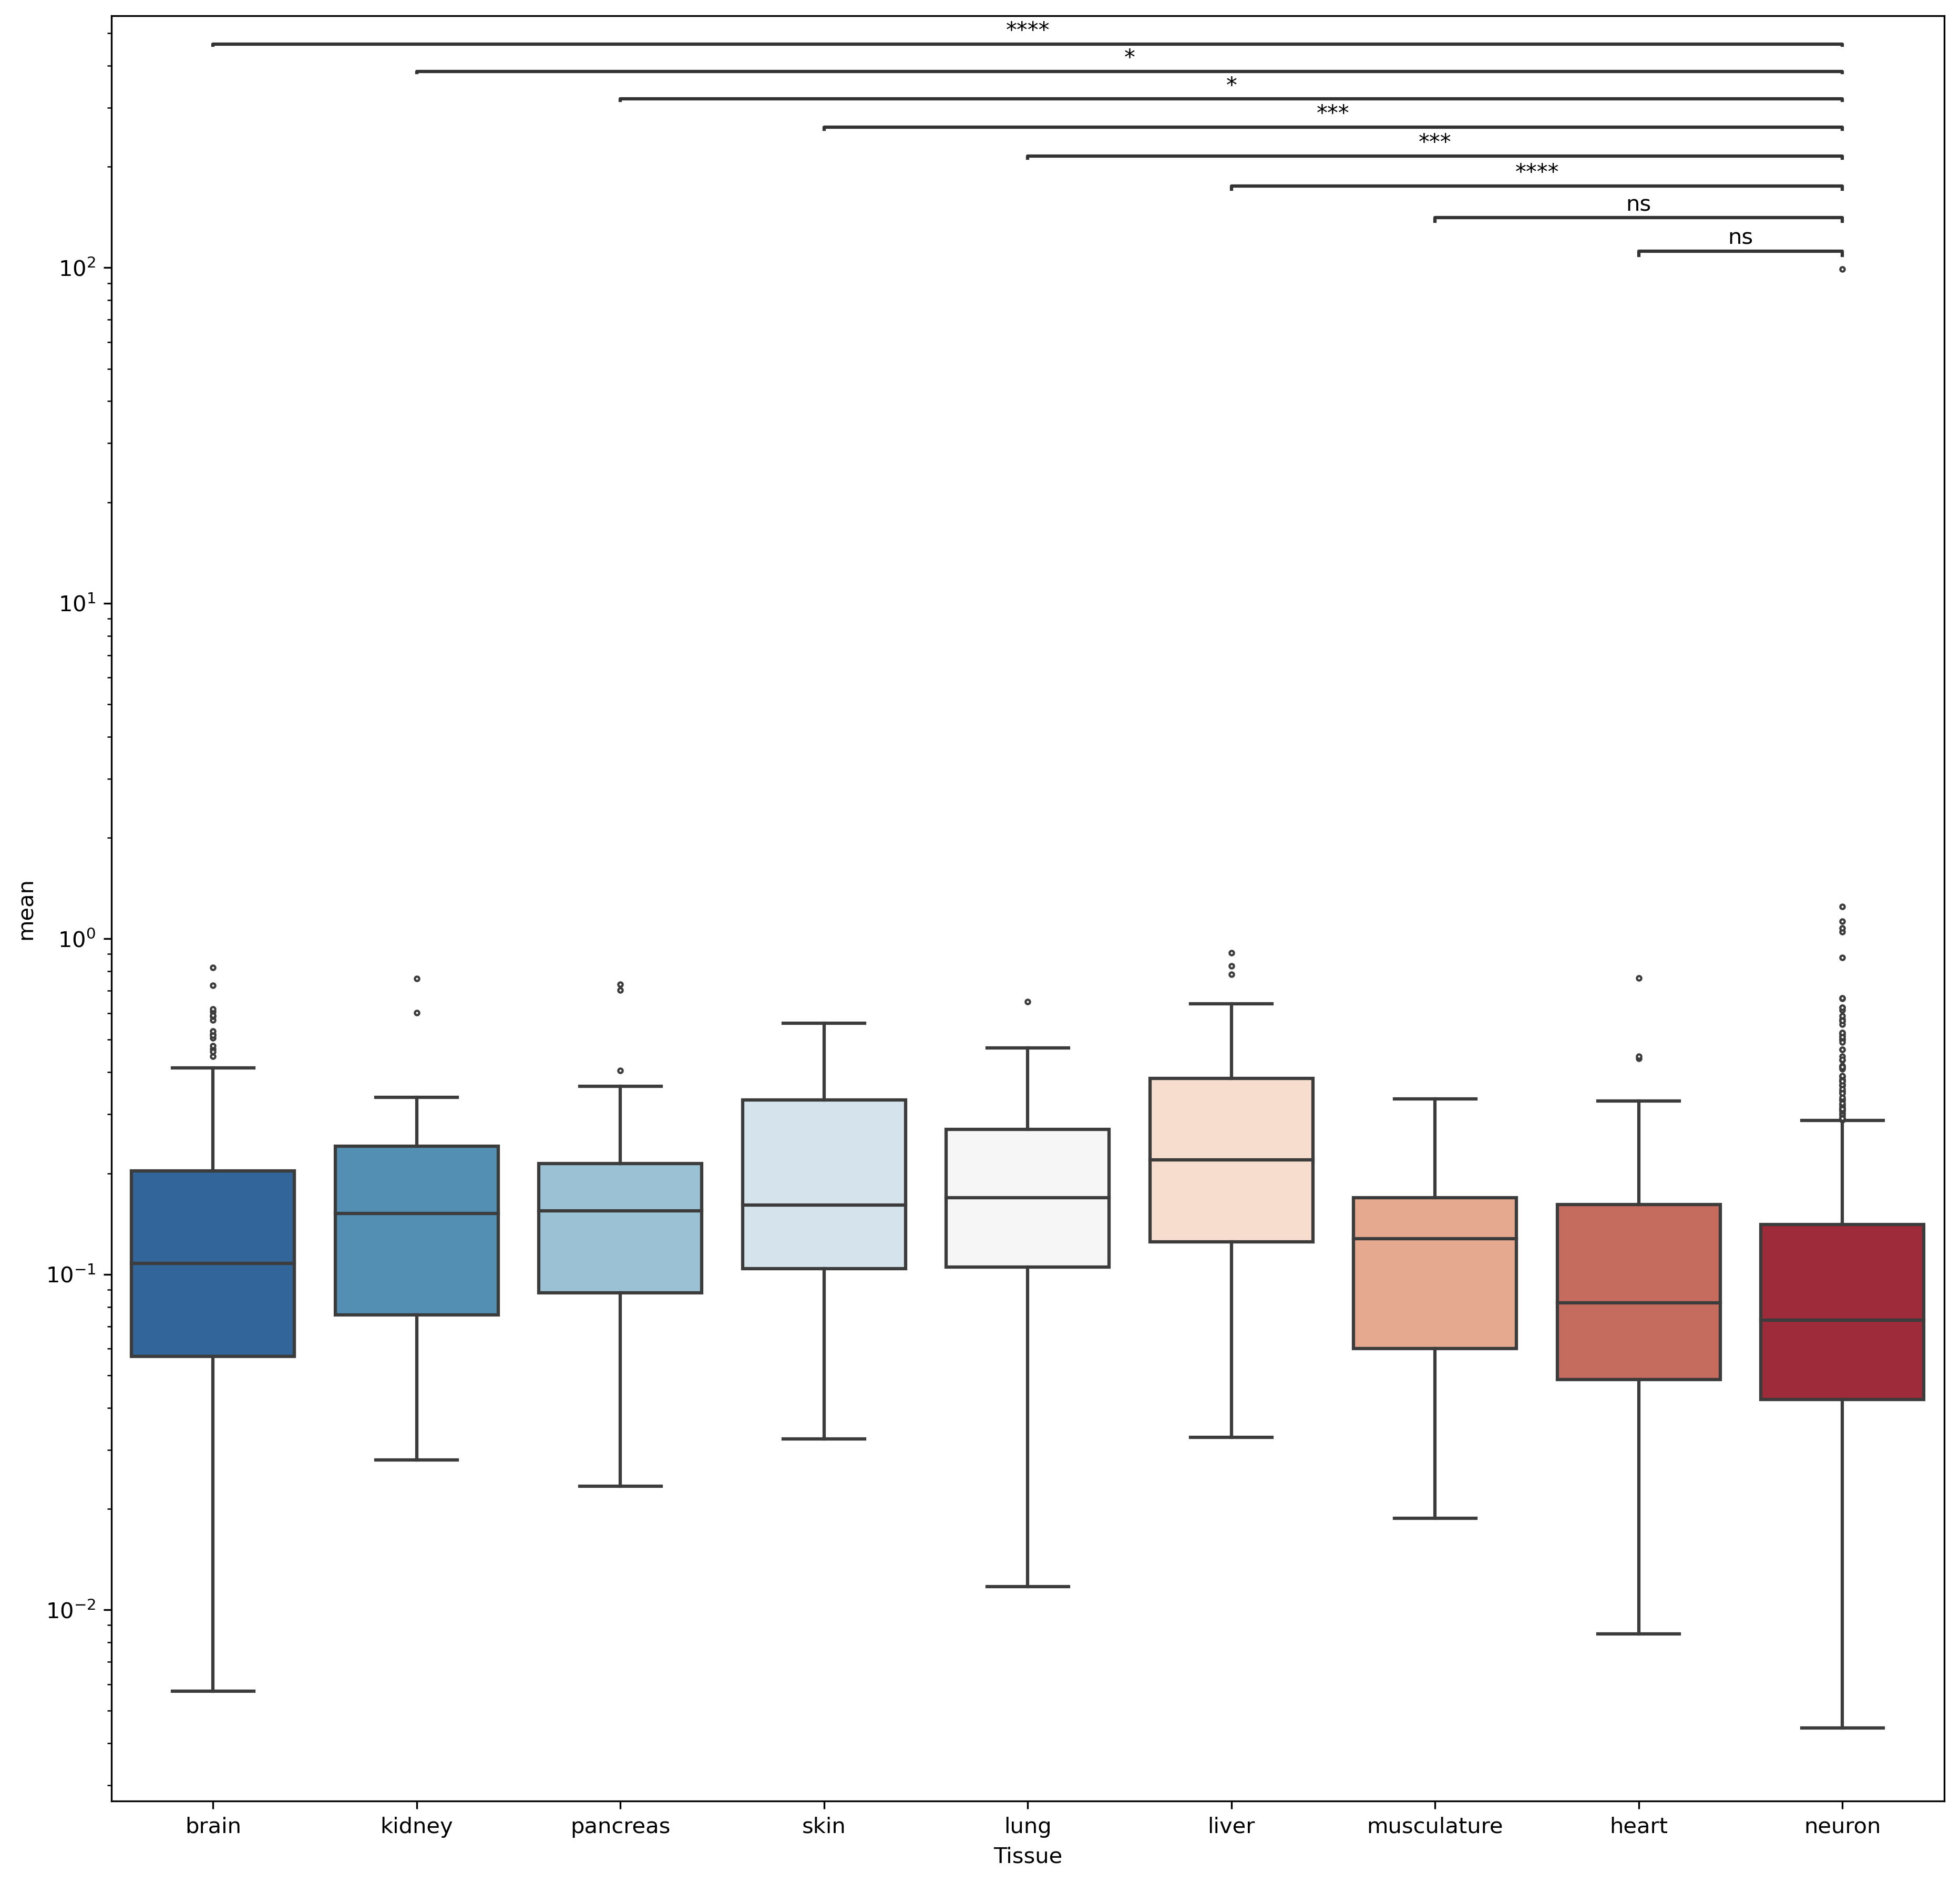

In [36]:
fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot()
x = "Tissue"
y = "mean"
order=['brain','kidney','pancreas','skin','lung','liver','musculature','heart','neuron']
flierprops = dict(marker='o',markerfacecolor='1', markersize=2,linestyle='none')
palette=sns.color_palette('RdBu_r', n_colors=9)
sns.boxplot(ax=ax,data=concat_df, x=x, y=y, order=order, flierprops=flierprops,palette=palette)
ax.set(yscale='log')
add_stat_annotation(ax,data=concat_df, x=x, y=y, order=order,
                                   box_pairs=[('pancreas','neuron'),('musculature','neuron'),('lung','neuron'),
                                              ('kidney','neuron'),('liver','neuron'),('brain','neuron'),
                                              ('heart','neuron'),('skin','neuron')],
                                   comparisons_correction=None,
                                   pvalue_thresholds=[[1e-7, "****"], [1e-6, "***"], [1e-5, "**"], [1e-4, "*"], [1, "ns"]],
                                   test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
plt.show()
fig.savefig('../figures/mouse.neuron_vs_organs_conservative.pdf', transparent=True)

heart v.s. neuron: Mann-Whitney-Wilcoxon test two-sided, P_val=2.323e-01 U_stat=3.431e+04
musculature v.s. neuron: Mann-Whitney-Wilcoxon test two-sided, P_val=8.853e-02 U_stat=1.368e+04
liver v.s. neuron: Mann-Whitney-Wilcoxon test two-sided, P_val=2.590e-20 U_stat=8.124e+04
lung v.s. neuron: Mann-Whitney-Wilcoxon test two-sided, P_val=2.703e-07 U_stat=3.591e+04
skin v.s. neuron: Mann-Whitney-Wilcoxon test two-sided, P_val=2.038e-07 U_stat=3.275e+04
pancreas v.s. neuron: Mann-Whitney-Wilcoxon test two-sided, P_val=6.816e-05 U_stat=3.709e+04
kidney v.s. neuron: Mann-Whitney-Wilcoxon test two-sided, P_val=1.646e-05 U_stat=3.867e+04
brain v.s. neuron: Mann-Whitney-Wilcoxon test two-sided, P_val=6.176e-11 U_stat=3.230e+05


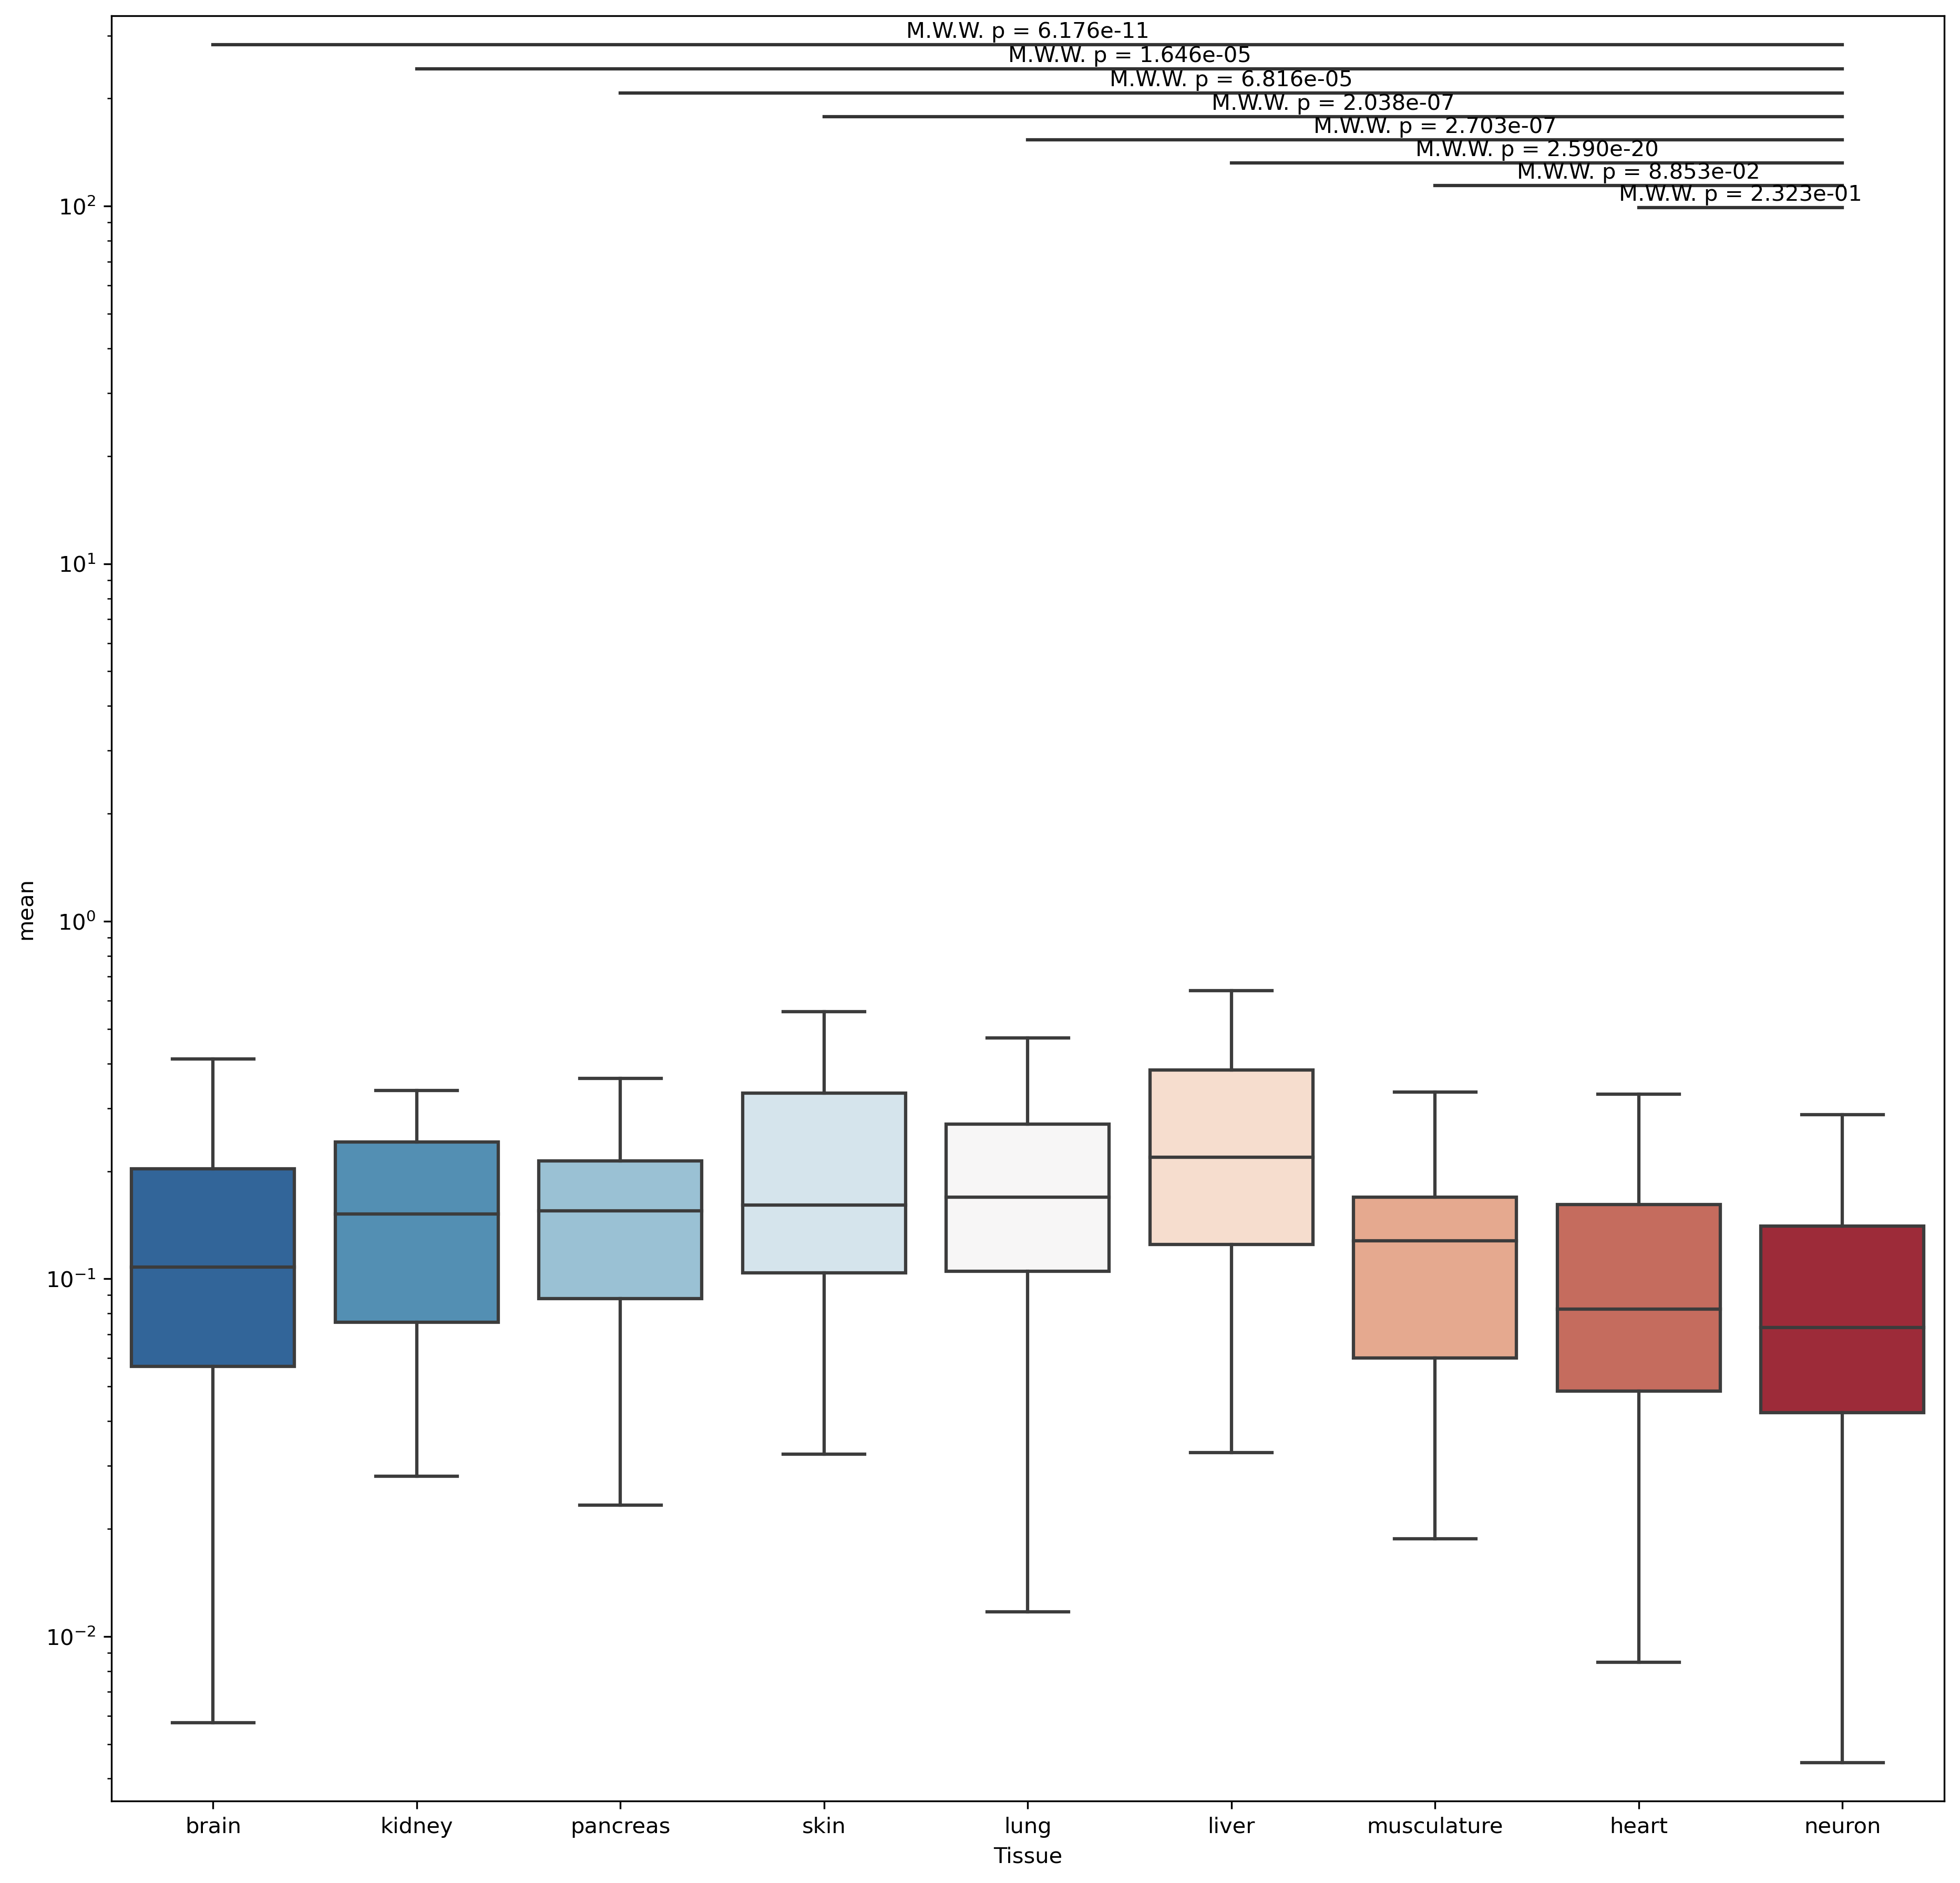

In [44]:
fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot()
x = "Tissue"
y = "mean"
order=['brain','kidney','pancreas','skin','lung','liver','musculature','heart','neuron']
flierprops = dict(marker='o',markerfacecolor='1', markersize=2,linestyle='none')
palette=sns.color_palette('RdBu_r', n_colors=9)
# sns.boxplot(ax=ax,data=concat_df, x=x, y=y, order=order, flierprops=flierprops,palette=palette)
sns.boxplot(ax=ax,data=concat_df, x=x, y=y, order=order, showfliers=False,palette=palette)
ax.set(yscale='log')
add_stat_annotation(ax,data=concat_df, x=x, y=y, order=order,
                                   box_pairs=[('pancreas','neuron'),('musculature','neuron'),('lung','neuron'),
                                              ('kidney','neuron'),('liver','neuron'),('brain','neuron'),
                                              ('heart','neuron'),('skin','neuron')],
                                   comparisons_correction=None,
                                   test='Mann-Whitney', text_format='full', loc='inside', verbose=2)
plt.show()
fig.savefig('../figures/mouse.neuron_vs_organs_p_values.pdf', transparent=True)

In [11]:
# Creating a figure 
fig = plt.figure(figsize=(10,7.5)) # Size of a letter size paper in horizontal
fig.suptitle('Distribution of dN/dS of Mouse Tissue-specific Genes', fontsize=14)

# Setting subplot space
grid = plt.GridSpec(nrows=1,ncols=1)
#grid.update(wspace=0.5, hspace=0.3)

# The subplot for distribution histogram 
distr_plot = fig.add_subplot(grid[:,:])
#distr_hist = dist_GO_df.plot(ax=distr_plot, kind='hist',alpha=0.3,bins=np.logspace(np.log10(0.001),np.log10(10), 100), logx=True, color=['royalblue','orange','lightgreen'])

# Set up the bins for log scale x-axis, and get the centers
bins=np.logspace(np.log10(0.001),np.log10(10), 50)
bins_cntr = (bins[1:] + bins[:-1]) / 2

# brain-specific genes' dN/dS histogram and curve
brain_counts, brain_bin_edges, ignored = distr_plot.hist(brain_arr,bins,histtype='stepfilled',alpha=0.3,weights=np.ones(len(brain_arr)) / len(brain_arr),color='cyan',label='dN/dS of brain-specific genes (med={0:.3f})'.format(np.median(brain_arr)))
try:
    # calculate area of histograms (area under PDF should be 1)
    brain_area_hist = ((brain_bin_edges[1:] - brain_bin_edges[:-1]) * brain_counts).sum()
    brain_shape, brain_loc, brain_scale = stats.lognorm.fit(brain_arr)
    # pdf-values using cdf 
    brain_fit_log_cntr_ = stats.lognorm.cdf(bins, brain_shape, loc=brain_loc, scale=brain_scale)
    brain_fit_log_cntr = np.diff(brain_fit_log_cntr_)
    # plot fitted and scaled PDFs into histogram
    distr_plot.plot(bins_cntr, brain_fit_log_cntr * brain_counts.sum(),'c-', 
                    label='lognormal fit of brain-specific dN/dS distribution', linewidth=2)
except ValueError:
    pass

# heart-specific genes' dN/dS histogram and curve
heart_counts, heart_bin_edges, ignored = distr_plot.hist(heart_arr,bins,histtype='stepfilled',alpha=0.3,weights=np.ones(len(heart_arr)) / len(heart_arr),color='red',label='dN/dS of heart-specific genes (med={0:.3f})'.format(np.median(heart_arr)))
try:
    # calculate area of histograms (area under PDF should be 1)
    heart_area_hist = ((heart_bin_edges[1:] - heart_bin_edges[:-1]) * heart_counts).sum()
    heart_shape, heart_loc, heart_scale = stats.lognorm.fit(heart_arr)
    # pdf-values using cdf 
    heart_fit_log_cntr_ = stats.lognorm.cdf(bins, heart_shape, loc=heart_loc, scale=heart_scale)
    heart_fit_log_cntr = np.diff(heart_fit_log_cntr_)
    # plot fitted and scaled PDFs into histogram
    distr_plot.plot(bins_cntr, heart_fit_log_cntr * heart_counts.sum(),'r-', 
                    label='lognormal fit of heart-specific dN/dS distribution', linewidth=2)
except ValueError:
    pass

# kidney-specific genes' dN/dS histogram and curve
kidney_counts, kidney_bin_edges, ignored = distr_plot.hist(kidney_arr,bins,histtype='stepfilled',alpha=0.3,weights=np.ones(len(kidney_arr)) / len(kidney_arr),color='black',label='dN/dS of kidney-specific genes (med={0:.3f})'.format(np.median(kidney_arr)))
try:
    # calculate area of histograms (area under PDF should be 1)
    kidney_area_hist = ((kidney_bin_edges[1:] - kidney_bin_edges[:-1]) * kidney_counts).sum()
    kidney_shape, kidney_loc, kidney_scale = stats.lognorm.fit(kidney_arr)
    # pdf-values using cdf 
    kidney_fit_log_cntr_ = stats.lognorm.cdf(bins, kidney_shape, loc=kidney_loc, scale=kidney_scale)
    kidney_fit_log_cntr = np.diff(kidney_fit_log_cntr_)
    # plot fitted and scaled PDFs into histogram
    distr_plot.plot(bins_cntr, kidney_fit_log_cntr * kidney_counts.sum(),'k-', 
                    label='lognormal fit of kidney-specific dN/dS distribution', linewidth=2)
except ValueError:
    pass

# liver-specific genes' dN/dS histogram and curve
liver_counts, liver_bin_edges, ignored = distr_plot.hist(liver_arr,bins,histtype='stepfilled',alpha=0.3,weights=np.ones(len(liver_arr)) / len(liver_arr),color='green',label='dN/dS of liver-specific genes (med={0:.3f})'.format(np.median(liver_arr)))
try:
    # calculate area of histograms (area under PDF should be 1)
    liver_area_hist = ((liver_bin_edges[1:] - liver_bin_edges[:-1]) * liver_counts).sum()
    liver_shape, liver_loc, liver_scale = stats.lognorm.fit(liver_arr)
    # pdf-values using cdf 
    liver_fit_log_cntr_ = stats.lognorm.cdf(bins, liver_shape, loc=liver_loc, scale=liver_scale)
    liver_fit_log_cntr = np.diff(liver_fit_log_cntr_)
    # plot fitted and scaled PDFs into histogram
    distr_plot.plot(bins_cntr, liver_fit_log_cntr * liver_counts.sum(),'g-', 
                    label='lognormal fit of liver-specific dN/dS distribution', linewidth=2)
except ValueError:
    pass

# lung-specific genes' dN/dS histogram and curve
lung_counts, lung_bin_edges, ignored = distr_plot.hist(lung_arr,bins,histtype='stepfilled',alpha=0.3,weights=np.ones(len(lung_arr)) / len(lung_arr),color='magenta',label='dN/dS of lung-specific genes (med={0:.3f})'.format(np.median(lung_arr)))
try:
    # calculate area of histograms (area under PDF should be 1)
    lung_area_hist = ((lung_bin_edges[1:] - lung_bin_edges[:-1]) * lung_counts).sum()
    lung_shape, lung_loc, lung_scale = stats.lognorm.fit(lung_arr)
    # pdf-values using cdf 
    lung_fit_log_cntr_ = stats.lognorm.cdf(bins, lung_shape, loc=lung_loc, scale=lung_scale)
    lung_fit_log_cntr = np.diff(lung_fit_log_cntr_)
    # plot fitted and scaled PDFs into histogram
    distr_plot.plot(bins_cntr, lung_fit_log_cntr * lung_counts.sum(),'m-', 
                    label='lognormal fit of lung-specific dN/dS distribution', linewidth=2)
except ValueError:
    pass

# pancreas-specific genes' dN/dS histogram and curve
pancreas_counts, pancreas_bin_edges, ignored = distr_plot.hist(pancreas_arr,bins,histtype='stepfilled',alpha=0.3,weights=np.ones(len(pancreas_arr)) / len(pancreas_arr),color='blue',label='dN/dS of pancreas-specific genes (med={0:.3f})'.format(np.median(pancreas_arr)))
try:
    # calculate area of histograms (area under PDF should be 1)
    pancreas_area_hist = ((pancreas_bin_edges[1:] - pancreas_bin_edges[:-1]) * pancreas_counts).sum()
    pancreas_shape, pancreas_loc, pancreas_scale = stats.lognorm.fit(pancreas_arr)
    # pdf-values using cdf 
    pancreas_fit_log_cntr_ = stats.lognorm.cdf(bins, pancreas_shape, loc=pancreas_loc, scale=pancreas_scale)
    pancreas_fit_log_cntr = np.diff(pancreas_fit_log_cntr_)
    # plot fitted and scaled PDFs into histogram
    distr_plot.plot(bins_cntr, pancreas_fit_log_cntr * pancreas_counts.sum(),'b-', 
                    label='lognormal fit of pancreas-specific dN/dS distribution', linewidth=2)
except ValueError:
    pass

# skin-specific genes' dN/dS histogram and curve
skin_counts, skin_bin_edges, ignored = distr_plot.hist(skin_arr,bins,histtype='stepfilled',alpha=0.3,weights=np.ones(len(skin_arr)) / len(skin_arr),color='yellow',label='dN/dS of skin-specific genes (med={0:.3f})'.format(np.median(skin_arr)))
try:
    # calculate area of histograms (area under PDF should be 1)
    skin_area_hist = ((skin_bin_edges[1:] - skin_bin_edges[:-1]) * skin_counts).sum()
    skin_shape, skin_loc, skin_scale = stats.lognorm.fit(skin_arr)
    # pdf-values using cdf 
    skin_fit_log_cntr_ = stats.lognorm.cdf(bins, skin_shape, loc=skin_loc, scale=skin_scale)
    skin_fit_log_cntr = np.diff(skin_fit_log_cntr_)
    # plot fitted and scaled PDFs into histogram
    distr_plot.plot(bins_cntr, skin_fit_log_cntr * skin_counts.sum(),'y-', 
                    label='lognormal fit of skin-specific dN/dS distribution', linewidth=2)
except ValueError:
    pass

# Axis labels
distr_plot.set_xlabel(xlabel='dN/dS')
distr_plot.set_ylabel(ylabel='percentage of genes')
distr_plot.set_xscale('log')
distr_plot.legend(loc='best')
distr_plot.yaxis.set_major_formatter(mtick.PercentFormatter(1))

fig.savefig('../figures/mouse.organs.pdf')
fig.savefig('../figures/mouse.organs.eps')
fig.savefig('../figures/mouse.organs.png')
plt.close()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back